## Import packages and check working directory

In [1]:
import os
os.getcwd()

'C:\\Users\\40331980\\Documents'

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Import and check csv

In [2]:
data = pd.read_csv("OFSP_English_rpts_rmv.csv", encoding= 'unicode_escape')

C:\Users\amona\AppData\Local\Temp\ipykernel_2668\1582533793.py:1: DtypeWarning: Columns (2,29,149,150,155,190,195,196,197,198,199,203,204,205,206,207,211,212,213,214,215,219,220,221,222,223,227,228,229,230,231,235,236,237,238,239,243,244,245,246,247,251,252,253,254,255,259,260,261,262,263,267,268,269,270,271,275,276,277,278,279,283,284,285,286,287,291,292,293,294,295,299,301,302,303,307,309,310,311,315,316,317,318,319,323,325,326,327,334,339,342) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("OFSP_English_rpts_rmv.csv", encoding= 'unicode_escape')


In [3]:
data.head()

,PatientID,Dateofbirth,Departmentid,CountryID,Sex,Profession,Smoker,____,____.1,UserID,...,Treatmentname.38,Treatmentname.39,Shorttreatmentname.18,ATCcode.15,ATCclass.19,Dosage.32,Dosage.33,Table :,Numberofthevisist,Incorrectvisit
0,1,21-Nov-73,33.0,74.0,2.0,5.0,fumeur ancien,0.0,NaN,543.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN
1,1,NaN,NaN,NaN,NaN,NaN,fumeur ancien,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
2,1,NaN,NaN,NaN,NaN,NaN,fumeur ancien,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN
3,1,NaN,NaN,NaN,NaN,NaN,fumeur ancien,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN
4,2,10-Nov-33,17.0,74.0,1.0,7.0,non fumeur,0.0,NaN,543.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN


In [4]:
data.shape

(190537, 357)

In [5]:
data.columns

Index(['PatientID', 'Dateofbirth', 'Departmentid', 'CountryID', 'Sex',
       'Profession', 'Smoker', ' ____', ' ____.1', ' UserID',
       ...
       'Treatmentname.38', 'Treatmentname.39', 'Shorttreatmentname.18',
       ' ATCcode.15', 'ATCclass.19', 'Dosage.32', 'Dosage.33', 'Table :',
       'Numberofthevisist', 'Incorrectvisit'],
      dtype='object', length=357)

### Observing distribution of severity by age and gender

In [9]:
# First I need to make a severity column
def severity (row):
   if row['Apnea_hypopnea_index'] < 5 :
      return 0
   if row['Apnea_hypopnea_index'] >= 5 and row['Apnea_hypopnea_index'] < 15 :
      return 1
   if row['Apnea_hypopnea_index'] >= 15 and row['Apnea_hypopnea_index'] < 30 :
      return 2
   if row['Apnea_hypopnea_index'] >= 30 :
      return 3

#Applying function to data
data['Severity'] = data.apply (lambda row: severity(row), axis=1)

In [11]:
data.shape

(190537, 358)

In [16]:
age_gender = data.groupby(['Severity', 'Sex']).agg({'Age': ['min', 'max', 'size']})
age_gender

Age                   
                    min         max   size
Severity Sex                              
0.0      1.0  18.015058   93.013005   5479
         2.0  18.026010   92.405202   5911
1.0      1.0  18.036961   93.251198   9953
         2.0  18.009582   96.265572   7626
2.0      1.0  18.157426   92.093087  11338
         2.0  18.001369   94.075291   6405
3.0      1.0  18.061602  111.868583  24604
         2.0  18.450376   93.694730   8835

## Creating data frames by category

In [6]:
demographic = ['PatientID','Sex','Age','Current_smoker','Former_smoker','Sedentary']

In [7]:
demographic_df = data[demographic]
demographic_df.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary
0,1,2.0,35.167693,0.0,1.0,0.0
1,1,NaN,36.522929,0.0,1.0,0.0
2,1,NaN,36.591376,0.0,1.0,0.0
3,1,NaN,38.576318,0.0,1.0,0.0
4,2,1.0,75.252567,0.0,0.0,1.0


In [8]:
measurements = ['Height','Weight','Cervical_perimeter',
               'Abdominal_perimeter','Systolic_BP','Diastolic_BP','Bloodsugar_level','Blood_total_cholesterol','HDL_level',
               'LDL_level','Triglycerides_level','Maxillofacial_profile','BMI','High_BP','PH']

In [9]:
measurements_df = data[measurements]
measurements_df.head()

,Height,Weight,Cervical_perimeter,Abdominal_perimeter,Systolic_BP,Diastolic_BP,Bloodsugar_level,Blood_total_cholesterol,HDL_level,LDL_level,Triglycerides_level,Maxillofacial_profile,BMI,High_BP,PH
0,166.0,100.0,35.0,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,36.289737,1.0,NaN
1,NaN,95.0,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,NaN,95.0,38.0,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,7.46
4,167.0,70.0,41.0,105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,25.099502,1.0,NaN


In [10]:
comorbidities = ['Asthma','Rhinitis','COPD','Respiratory_fail','Myocardial_infarct','Coronary_fail','Arrhythmias','Stroke',
                 'Heart_fail','Arteriopathy','Gastric_reflux','Glaucoma','Diabetes','Hypercholesterolemia','Hypertriglyceridemia',
                 'Hypo(er)thyroidism','Depression','Obesity','Dysmorphology','Restless_Leg_Syndrome','Aerophagia']

In [11]:
comorbidities_df = data[comorbidities]
comorbidities_df.head()

,Asthma,Rhinitis,COPD,Respiratory_fail,Myocardial_infarct,Coronary_fail,Arrhythmias,Stroke,Heart_fail,Arteriopathy,...,Glaucoma,Diabetes,Hypercholesterolemia,Hypertriglyceridemia,Hypo(er)thyroidism,Depression,Obesity,Dysmorphology,Restless_Leg_Syndrome,Aerophagia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,0.0,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [12]:
symptoms=['Snoring','Diurnal_somnolence','Driving_drowsiness','Morning_fatigue','Morning_headache','Memory_problem',
          'Nocturnal_perspiration','Shortness_of_breath_on_exertion','Nocturia','Drowsiness_accident','Near_miss_accident',
          'Respiratory_arrest','Skin_lesions']

In [13]:
symptoms_df = data[symptoms]
symptoms_df.head()

,Snoring,Diurnal_somnolence,Driving_drowsiness,Morning_fatigue,Morning_headache,Memory_problem,Nocturnal_perspiration,Shortness_of_breath_on_exertion,Nocturia,Drowsiness_accident,Near_miss_accident,Respiratory_arrest,Skin_lesions
0,NaN,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,NaN
1,NaN,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN


In [14]:
treatments =['ENT_surgery','CPAP','Two_levels_pressure_ventilation','Assisted_Servoventilation','Mandibular_advance_orthosis',
             'Oxygen_therapy','MaxilloFacial_surgery','Drug_treatment_Modafinil','RLS_drug_treatment','Other_treatments',
             'Diet','Smoking_cessation','Reduction_alcohol_consumption','Physical_activity','Humidifier']


In [15]:
treatments_df = data[treatments]
treatments_df.head()

,ENT_surgery,CPAP,Two_levels_pressure_ventilation,Assisted_Servoventilation,Mandibular_advance_orthosis,Oxygen_therapy,MaxilloFacial_surgery,Drug_treatment_Modafinil,RLS_drug_treatment,Other_treatments,Diet,Smoking_cessation,Reduction_alcohol_consumption,Physical_activity,Humidifier
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,1.0,0.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [16]:
questionnaires = ['Epworth_scale','Pichots_scale','Depression_scale']

In [17]:
questionnaires_df = data[questionnaires]
questionnaires_df.head()

,Epworth_scale,Pichots_scale,Depression_scale
0,6.0,24.0,10.0
1,8.0,25.0,9.0
2,2.0,24.0,12.0
3,8.0,24.0,11.0
4,5.0,3.0,6.0


In [18]:
psg = ['Corrected_average_duration_sleep','Spirometry','FEV1',
         'Inspiratory_capacity','PAO2','PACO2','Number_oxygen_desaturation','Mean_oxygen_saturation',
         'Corrected_saturation_cumulated_time','Health_state_scale_doctor']

In [19]:
psg_df = data[psg]
psg_df.head()

,Corrected_average_duration_sleep,Spirometry,FEV1,Inspiratory_capacity,PAO2,PACO2,Number_oxygen_desaturation,Mean_oxygen_saturation,Corrected_saturation_cumulated_time,Health_state_scale_doctor
0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,96.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,83.0,2.29,89.0,31.0,NaN,NaN,NaN,96.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
diagnoses= ['Sleep_apnea_syndrome','Obstructive_sleep_apnea','Central_sleep_apnea','Mixed_sleep_apnea','Other_sleep_disorder',
        'Hygiene-Dietetictips','Apnea_hypopnea_index','Microawakening_index','Residual_apnea_hypopnea']

In [21]:
diagnoses_df = data[diagnoses]
diagnoses_df.head()

,Sleep_apnea_syndrome,Obstructive_sleep_apnea,Central_sleep_apnea,Mixed_sleep_apnea,Other_sleep_disorder,Hygiene-Dietetictips,Apnea_hypopnea_index,Microawakening_index,Residual_apnea_hypopnea
0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


## Combining dataframes into a new df

In [22]:
osa_all = [demographic_df,measurements_df,comorbidities_df, symptoms_df,treatments_df, questionnaires_df, psg_df, diagnoses_df] # this is a list
osa_all_df = pd.concat(osa_all, axis=1)   # this is a dataframe


In [23]:
osa_all_df.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Health_state_scale_doctor,Sleep_apnea_syndrome,Obstructive_sleep_apnea,Central_sleep_apnea,Mixed_sleep_apnea,Other_sleep_disorder,Hygiene-Dietetictips,Apnea_hypopnea_index,Microawakening_index,Residual_apnea_hypopnea
0,1,2.0,35.167693,0.0,1.0,0.0,166.0,100.0,35.0,114.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,NaN
1,1,NaN,36.522929,0.0,1.0,0.0,NaN,95.0,NaN,104.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,36.591376,0.0,1.0,0.0,NaN,98.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,38.576318,0.0,1.0,0.0,NaN,95.0,38.0,108.0,...,96.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1.0,75.252567,0.0,0.0,1.0,167.0,70.0,41.0,105.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [24]:
osa_all_df.shape

(190537, 92)

In [25]:
osa_all_df.drop_duplicates(subset ="PatientID", keep = 'first', inplace = True) # this drops repeated Patient ID rows and only keeps the 1st instance

In [26]:
osa_all_df.shape

(111194, 92)

In [27]:
osa_all_df.head()

,PatientID,Sex,Age,Current_smoker,Former_smoker,Sedentary,Height,Weight,Cervical_perimeter,Abdominal_perimeter,...,Health_state_scale_doctor,Sleep_apnea_syndrome,Obstructive_sleep_apnea,Central_sleep_apnea,Mixed_sleep_apnea,Other_sleep_disorder,Hygiene-Dietetictips,Apnea_hypopnea_index,Microawakening_index,Residual_apnea_hypopnea
0,1,2.0,35.167693,0.0,1.0,0.0,166.0,100.0,35.0,114.0,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,NaN
4,2,1.0,75.252567,0.0,0.0,1.0,167.0,70.0,41.0,105.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6,3,1.0,35.014374,0.0,0.0,0.0,178.0,96.0,44.0,109.0,...,NaN,0.0,0.0,0.0,0.0,1.0,1.0,49.0,45.0,NaN
7,4,1.0,48.802190,0.0,1.0,1.0,182.0,81.0,38.0,96.0,...,75.0,0.0,0.0,0.0,0.0,1.0,0.0,15.0,15.0,NaN
8,5,2.0,19.641342,0.0,1.0,0.0,180.0,117.0,48.0,118.0,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


## Exporting clean df to csv

In [28]:
osa_all_df.to_csv("OSA_clean.csv")

## Subsetting df with demographic, measurement, comorbidity, symptoms,  questionnaire data, with AHI severity

In [19]:
osa_simple = [demographic_df,measurements_df,comorbidities_df, symptoms_df, questionnaires_df, data['Apnea_hypopnea_index']] # this is a list
osa_simple_df = pd.concat(osa_simple, axis=1)   # this is a dataframe


In [20]:
osa_simple_df.shape

(190537, 59)

### Dropping rows with duplicate patient IDs. Keeping 1st instance

In [21]:
osa_simple_df.drop_duplicates(subset ="PatientID", keep = 'first', inplace = True) # this drops repeated Patient ID rows and only keeps the 1st instance

In [22]:
osa_simple_df.shape

(111194, 59)

## Dataframe with columns >80% NaN dropped

### Percentages of missing values

In [40]:
(osa_simple_df.isnull().sum()/len(osa_simple_df))*100

PatientID                           0.000000
Sex                                 0.393906
Age                                 8.334083
Current_smoker                      8.504056
Former_smoker                       8.500459
Sedentary                           8.622767
Height                             12.116661
Weight                             11.926903
Cervical_perimeter                 54.630646
Abdominal_perimeter                54.069464
Systolic_BP                        60.235264
Diastolic_BP                       60.474486
Bloodsugar_level                   94.160656
Blood_total_cholesterol            94.112992
HDL_level                          94.369301
LDL_level                          94.452039
Triglycerides_level                94.151663
Maxillofacial_profile              22.702664
BMI                                12.676044
High_BP                             8.745076
PH                                 83.685271
Asthma                              8.694714
Rhinitis  

In [23]:
threshold = 80.0
min_count =  int(((100-threshold)/100)*osa_simple_df.shape[0] + 1)  # this calculates the minimum number of samples per column that must have NaN value to be dropped


osa_simple_nadrop = osa_simple_df.dropna( axis=1,thresh=min_count) # drop columns with more than 80% NaN
     

In [24]:
print('With NaN', osa_simple_df.shape)
print('Dropped NaN',osa_simple_nadrop.shape)

With NaN (111194, 59)
Dropped NaN (111194, 51)


### Remove patients with no AHI info

In [25]:
osa_simple_nadrop.dropna(subset=['Apnea_hypopnea_index'], inplace = True)

C:\Users\40331980\.conda\envs\Amonae\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [26]:
osa_simple_nadrop.shape

(80390, 51)

### Calculate severity based on AHI

In [27]:
# defining a function that assigns severity based on AHI
def severity (row):
   if row['Apnea_hypopnea_index'] < 5 :
      return 0
   if row['Apnea_hypopnea_index'] >= 5 and row['Apnea_hypopnea_index'] < 15 :
      return 1
   if row['Apnea_hypopnea_index'] >= 15 and row['Apnea_hypopnea_index'] < 30 :
      return 2
   if row['Apnea_hypopnea_index'] >= 30 :
      return 3

In [28]:
# applying function to create new Severity column

osa_simple_nadrop['Severity'] = osa_simple_nadrop.apply (lambda row: severity(row), axis=1)

C:\Users\40331980\.conda\envs\Amonae\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
osa_simple_nadrop.shape

(80390, 52)

In [29]:
osa_simple_nadrop.Severity.value_counts()  # how many of each severity are in the df

3    33552
2    17800
1    17617
0    11421
Name: Severity, dtype: int64

In [29]:
osa_simple_nadrop.Severity.value_counts(normalize=True) * 100

3    41.736534
2    22.142057
1    21.914417
0    14.206991
Name: Severity, dtype: float64

In [31]:
# removing the AHI column
del osa_simple_nadrop['Apnea_hypopnea_index']
osa_simple_nadrop.shape

(80390, 51)

## Dataframe with NAN replaced with either 0 or average

Continuous:
Age, Height, Weight, Cervical_perimeter, Abdominal_perimeter, Systolic_BP, Diastolic_BP, Bloodsugar_level, Blood_total_cholesterol, HDL_level, LDL_level, Triglycerides_level, BMI, PH
'Epworth_scale', 'Pichots_scale', 'Depression_scale',
       'Corrected_average_duration_sleep', 'Spirometry', 'FEV1',
       'Inspiratory_capacity', 'PAO2', 'PACO2', 'Number_oxygen_desaturation',
       'Mean_oxygen_saturation', 'Corrected_saturation_cumulated_time',
       'Health_state_scale_doctor'
       Apnea_hypopnea_index, Microawakening_index, Residual_apnea_hypopnea 

In [36]:
osa_simple_nadrop.columns

Index(['PatientID', 'Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale', 'Severity'],
      dtype='object')

In [30]:
continuous = ['PatientID','Age','Height','Weight','Cervical_perimeter','Abdominal_perimeter','Systolic_BP','Diastolic_BP',
              'BMI','Epworth_scale','Pichots_scale','Depression_scale']

continuous_df = osa_simple_nadrop[continuous] # continuous variables subset
categorical_df = osa_simple_nadrop.drop(columns=continuous) # categorical variables subset

continuous_filled = continuous_df.fillna(continuous_df.mean())  # filing continuous subset with mean of column
categorical_filled = categorical_df.fillna(0)                   # filling categorical subset with 0

data2 = pd.concat([continuous_filled, categorical_filled], axis=1) 

## Stratified train-test-split

In [31]:
features = ['Sex', 'Age', 'Current_smoker', 'Former_smoker',
       'Sedentary', 'Height', 'Weight', 'Cervical_perimeter',
       'Abdominal_perimeter', 'Systolic_BP', 'Diastolic_BP',
       'Maxillofacial_profile', 'BMI', 'High_BP', 'Asthma', 'Rhinitis', 'COPD',
       'Respiratory_fail', 'Myocardial_infarct', 'Coronary_fail',
       'Arrhythmias', 'Stroke', 'Heart_fail', 'Arteriopathy', 'Gastric_reflux',
       'Glaucoma', 'Diabetes', 'Hypercholesterolemia', 'Hypertriglyceridemia',
       'Hypo(er)thyroidism', 'Depression', 'Obesity', 'Dysmorphology',
       'Restless_Leg_Syndrome', 'Snoring', 'Diurnal_somnolence',
       'Driving_drowsiness', 'Morning_fatigue', 'Morning_headache',
       'Memory_problem', 'Nocturnal_perspiration',
       'Shortness_of_breath_on_exertion', 'Nocturia', 'Drowsiness_accident',
       'Near_miss_accident', 'Respiratory_arrest', 'Epworth_scale',
       'Pichots_scale', 'Depression_scale']
X=data2[features]  # Features  
y=data2['Severity']  # Labels

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2,
                                                    random_state=0)

In [35]:
print('\nClass distribution train (%):')
y_train.value_counts(normalize=True) * 100


Class distribution train (%):


3    41.735601
2    22.142057
1    21.915039
0    14.207302
Name: Severity, dtype: float64

In [68]:
print('\nClass distribution test (%):')
y_test.value_counts(normalize=True) * 100


Class distribution test (%):


3    41.740266
2    22.142057
1    21.911929
0    14.205747
Name: Severity, dtype: float64

#### A note: a comparison of boosting algorithms with RF and SVM can be found in 'Towards Validating the Effectiveness of Obstructive Sleep Apnea Classification from Electronic Health Records Using Machine Learning (Ramesh et al. 2021)​'

## Random Forest classifier

In [48]:
clf=RandomForestClassifier(n_estimators=100)  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4703943276526931


In [49]:
clf=RandomForestClassifier(n_estimators=100, class_weight='balanced')  #defining classifier method

clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4723846249533524


### 5-fold crossvalidation

In [37]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(clf, X, y, cv=5)
cross_val

array([0.45951493, 0.45829965, 0.46681595, 0.46774896, 0.46333271])

In [71]:
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.46 accuracy with a standard deviation of 0.01


### Classification report

In [54]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.29      0.34      2284
           1       0.33      0.24      0.28      3523
           2       0.27      0.10      0.15      3560
           3       0.54      0.85      0.66      6711

   micro avg       0.47      0.47      0.47     16078
   macro avg       0.39      0.37      0.36     16078
weighted avg       0.42      0.47      0.42     16078



### Balanced accuracy

In [56]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.3695357124647133

### G-mean

In [34]:
from imblearn.metrics import geometric_mean_score
geometric_mean_score(y_test, y_pred)

0.28246346499148123

### Confusion matrix

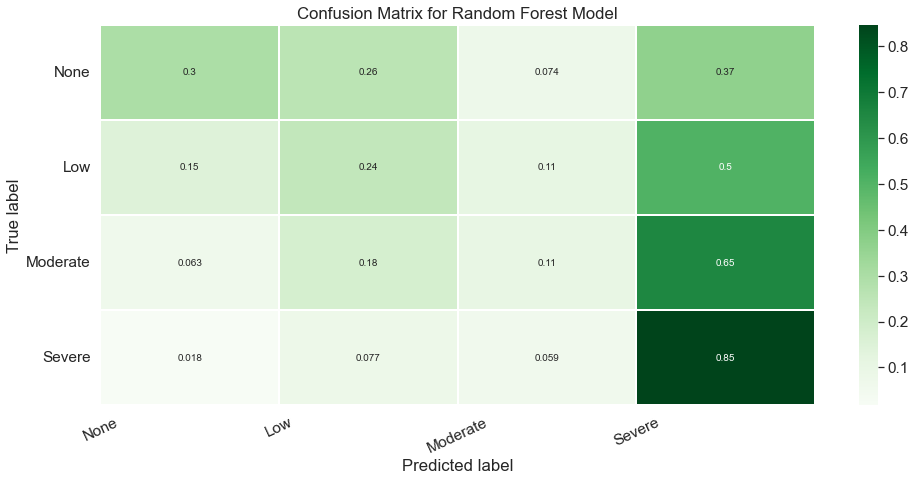

In [35]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

## Extra Trees Classifier

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100)
clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.46031844756810547


### 5-fold cross validation

In [41]:
cross_val = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.45 accuracy with a standard deviation of 0.00


### Classification report

In [54]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.29      0.34      2284
           1       0.33      0.24      0.28      3523
           2       0.27      0.10      0.15      3560
           3       0.54      0.85      0.66      6711

   micro avg       0.47      0.47      0.47     16078
   macro avg       0.39      0.37      0.36     16078
weighted avg       0.42      0.47      0.42     16078



### Balanced accuracy

In [56]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.3695357124647133

### G-mean

In [37]:
from imblearn.metrics import geometric_mean_score
geometric_mean_score(y_test, y_pred)

0.2838344318522864

### Confusion matrix

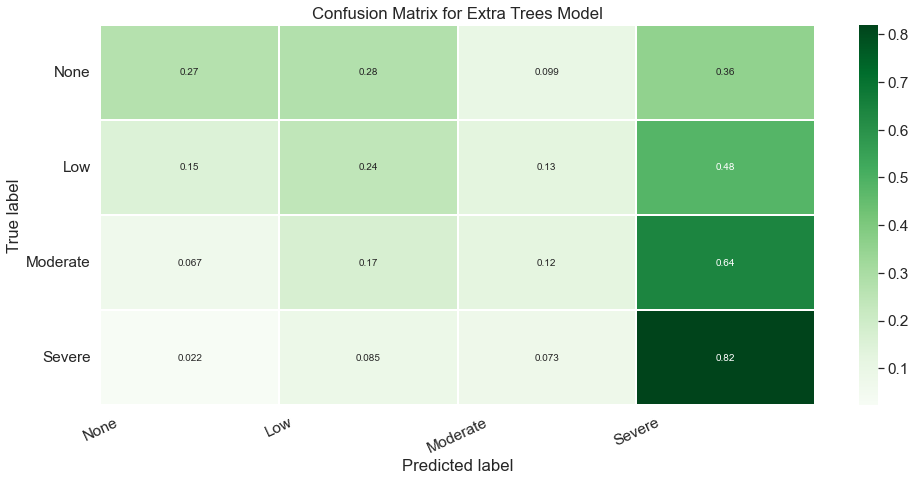

In [38]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Extra Trees Model')
plt.show()

## XGBoost Classifier

In [39]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators = 100)
clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4743127254633661


### 5-fold cross validation

In [44]:
cross_val = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.47 accuracy with a standard deviation of 0.00


### Classification report

In [54]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.29      0.34      2284
           1       0.33      0.24      0.28      3523
           2       0.27      0.10      0.15      3560
           3       0.54      0.85      0.66      6711

   micro avg       0.47      0.47      0.47     16078
   macro avg       0.39      0.37      0.36     16078
weighted avg       0.42      0.47      0.42     16078



### Balanced accuracy

In [56]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.3695357124647133

### G-mean

In [40]:
from imblearn.metrics import geometric_mean_score
geometric_mean_score(y_test, y_pred)

0.27947634496898577

### Confusion matrix

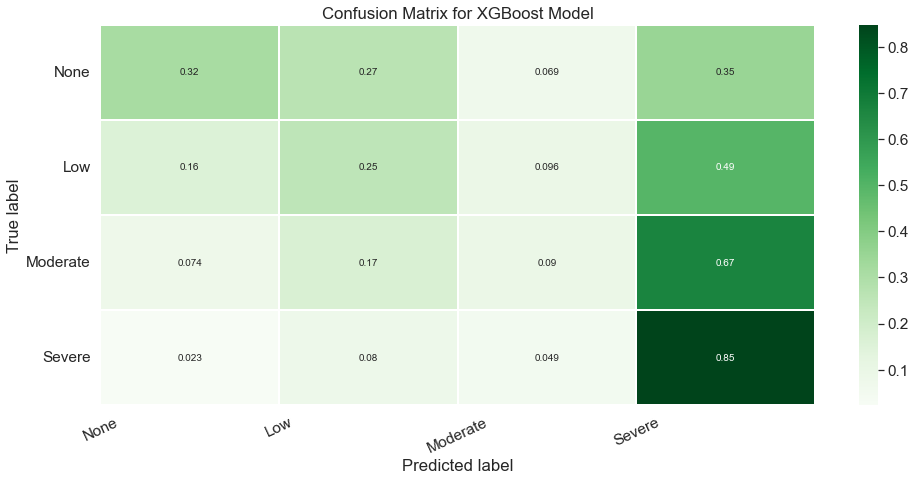

In [41]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

## LightGBM Classifier

In [42]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(n_estimators = 100)
clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.48059460131857196


### 5-fold cross validation

In [48]:
cross_val = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.4733 accuracy with a standard deviation of 0.0033


### Classification report

In [54]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.29      0.34      2284
           1       0.33      0.24      0.28      3523
           2       0.27      0.10      0.15      3560
           3       0.54      0.85      0.66      6711

   micro avg       0.47      0.47      0.47     16078
   macro avg       0.39      0.37      0.36     16078
weighted avg       0.42      0.47      0.42     16078



### Balanced accuracy

In [56]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.3695357124647133

### G-mean

In [43]:
from imblearn.metrics import geometric_mean_score
geometric_mean_score(y_test, y_pred)

0.258576596387807

### Confusion matrix

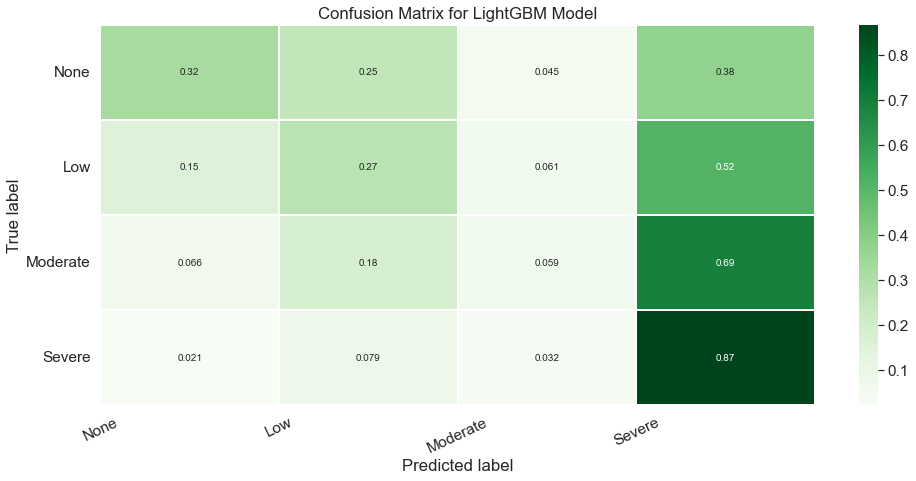

In [44]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for LightGBM Model')
plt.show()

## CATBoost Classifier

In [45]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(n_estimators = 100, silent=True)
clf.fit(X_train,y_train)                   # training classifier

y_pred=clf.predict(X_test)                  # testing classifier 

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.47393954471949246


### 5-fold cross validation

In [52]:
cross_val = cross_val_score(clf, X, y, cv=5)
print("%0.4f accuracy with a standard deviation of %0.4f" % (cross_val.mean(), cross_val.std()))

0.4670 accuracy with a standard deviation of 0.0044


### Classification report

In [54]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.43      0.29      0.34      2284
           1       0.33      0.24      0.28      3523
           2       0.27      0.10      0.15      3560
           3       0.54      0.85      0.66      6711

   micro avg       0.47      0.47      0.47     16078
   macro avg       0.39      0.37      0.36     16078
weighted avg       0.42      0.47      0.42     16078



### Balanced accuracy

In [56]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.3695357124647133

### G-mean

In [46]:
from imblearn.metrics import geometric_mean_score
geometric_mean_score(y_test, y_pred)

C:\Users\40331980\.conda\envs\Amonae\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2788537608175278

### Confusion matrix

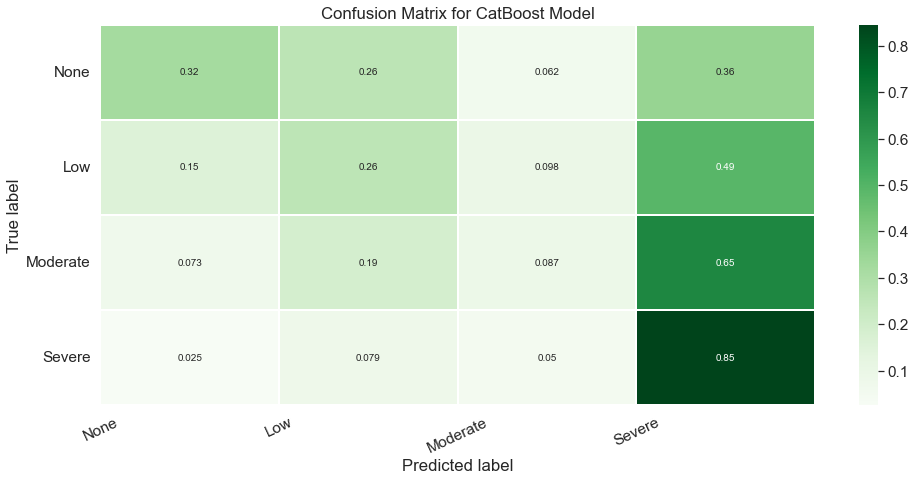

In [47]:
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['None', 'Low', 'Moderate', 
               'Severe']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for CatBoost Model')
plt.show()